In [83]:
install.packages("openxlsx")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [84]:
# library(DBI)
library(dplyr)
library(lubridate)
library(tidyverse)
library(readxl)
library(openxlsx)

In [2]:
dyn.load('/usr/lib/jvm/java-8-openjdk-amd64/jre/lib/amd64/server/libjvm.so')
library(rJava)
library(RJDBC)
library(ROracle)

Loading required package: DBI



In [3]:
# SQLITE3
db.con <- DBI::dbConnect(RSQLite::SQLite(), "/home/jovyan/work/Documents/data_files/EffVisR-database-output.sqlite")

In [8]:
options(java.parameters="-Xmx2g")

In [3]:
access_file <- file.path("/home/jovyan")
ojdbc_jarfile <- file.path(access_file, "ojdbc8.jar")
access_file <- file("/home/jovyan/work/Documents/security_files/oracle2", open = "r")

read_acess_values <- function(access_file) {
    ls_vars <- list()
    lines = readLines(access_file)
    for (i in 1:length(lines)) {
        splt_str <- strsplit(x = lines[i], split = ",")[[1]]
        var_name <- splt_str[1]
        var_value <- splt_str[2]
        ls_vars[[var_name]] <- var_value
    }
    close(access_file)
    return(ls_vars)
}

jdbcDriver <- JDBC(driverClass = "oracle.jdbc.OracleDriver", classPath = ojdbc_jarfile)

ls_vars <- read_acess_values(access_file)

connect_string <- paste0("jdbc:oracle:thin:@", ls_vars$`HOST-DEV`, ":", ls_vars$PORT, ":",
    ls_vars$SID)
print(connect_string)

[1] "jdbc:oracle:thin:@dotoradb-2022-dev.fount:1521:orcl_dm"


In [4]:
conn <- dbConnect(jdbcDriver, connect_string, ls_vars$USERNAME, ls_vars$PASSWORD)

In [5]:
fetch_data <- function(conn, query_str) {
    query_str <- strwrap(query_str, width = 10000, simplify = TRUE)
    print(query_str)
    d <- dbGetQuery(conn, query_str)
    return(d)
}

In [6]:
sql_query <- {'
SELECT  t0.group_id,
    t0.route,
    t0.frequency,
    t0.n_dosing,
    t0.subject_id,
    t0.subject_type,
    t0.dose_id,
    t0.dose,
    t0.dose_unit,
    t0.dosing_site,
    t0.is_fed,
    t0.experiment_id,
    t3.sample_id,
    t3.animal_id,
    t3.sampling_time,
    t4.batch_id,
    t4.formulation_id,
    t4.concentration,
    t4.concentration_unit,
    t4.treatment,
    t3.bw_g,
    t3.l_mm,
    t3.w_mm,
    t3.tv_mm_3 
FROM ft_pharm_group t0   
INNER JOIN ft_pharm_efficacy_raw t3 ON t0.experiment_id = t3.experiment_id 
    AND t0.subject_id = t3.animal_id
LEFT JOIN ft_pharm_dose t4 ON t0.experiment_id = t4.experiment_id 
    AND t0.DOSE_ID = t4.DOSE_ID
WHERE
    t0.experiment_id = 208769
'}


In [7]:
df <- fetch_data(conn, gsub("[\r\n]", " ", sql_query) )

[1] "SELECT t0.group_id, t0.route, t0.frequency, t0.n_dosing, t0.subject_id, t0.subject_type, t0.dose_id, t0.dose, t0.dose_unit, t0.dosing_site, t0.is_fed, t0.experiment_id, t3.sample_id, t3.animal_id, t3.sampling_time, t4.batch_id, t4.formulation_id, t4.concentration, t4.concentration_unit, t4.treatment, t3.bw_g, t3.l_mm, t3.w_mm, t3.tv_mm_3 FROM ft_pharm_group t0 INNER JOIN ft_pharm_efficacy_raw t3 ON t0.experiment_id = t3.experiment_id AND t0.subject_id = t3.animal_id LEFT JOIN ft_pharm_dose t4 ON t0.experiment_id = t4.experiment_id AND t0.DOSE_ID = t4.DOSE_ID WHERE t0.experiment_id = 208769"


In [8]:
df

,GROUP_ID,ROUTE,FREQUENCY,N_DOSING,SUBJECT_ID,SUBJECT_TYPE,DOSE_ID,DOSE,DOSE_UNIT,DOSING_SITE,⋯,SAMPLING_TIME,BATCH_ID,FORMULATION_ID,CONCENTRATION,CONCENTRATION_UNIT,TREATMENT,BW_G,L_MM,W_MM,TV_MM_3
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,G7,PO,BID,23,49,MS_001,6,10,mg/kg,oral gavage,⋯,2022-07-27 00:00:00,FT003972-01,F_002,1,mg/mL,"Vortex, stir",23.9,NA,NA,NA
2,G7,PO,BID,21,71,MS_001,6,10,mg/kg,oral gavage,⋯,2022-07-27 00:00:00,FT003972-01,F_002,1,mg/mL,"Vortex, stir",23.4,NA,NA,NA
3,G7,PO,BID,19,82,MS_001,6,10,mg/kg,oral gavage,⋯,2022-07-27 00:00:00,FT003972-01,F_002,1,mg/mL,"Vortex, stir",25.9,NA,NA,NA
4,G1,PO,BID,24,8,MS_001,NA,NA,NA,oral gavage,⋯,2022-07-28 00:00:00,NA,NA,NA,NA,NA,25.3,14.68,10.73,845.0754860000001
5,G1,PO,BID,19,34,MS_001,NA,NA,NA,oral gavage,⋯,2022-07-28 00:00:00,NA,NA,NA,NA,NA,24.9,12.57,12.12,923.2313039999999
6,G1,PO,BID,21,48,MS_001,NA,NA,NA,oral gavage,⋯,2022-07-28 00:00:00,NA,NA,NA,NA,NA,22.6,13.55,10.02,680.21271
7,G1,PO,BID,26,56,MS_001,NA,NA,NA,oral gavage,⋯,2022-07-28 00:00:00,NA,NA,NA,NA,NA,24.1,14.12,12.84,1163.951136
8,G1,PO,BID,19,74,MS_001,NA,NA,NA,oral gavage,⋯,2022-07-28 00:00:00,NA,NA,NA,NA,NA,25.3,14.79,11.28,940.9279679999997
9,G1,PO,BID,24,75,MS_001,NA,NA,NA,oral gavage,⋯,2022-07-28 00:00:00,NA,NA,NA,NA,NA,22.1,14.47,11.63,978.5836715


In [10]:
df2

,TV_MM_3,BW_G,GROUP_ID,ROUTE,FREQUENCY,N_DOSING,SUBJECT_TYPE,SUBJECT_ID,DOSE_ID,DOSE,DOSE_UNIT,DOSING_SITE,SAMPLE_ID,ANIMAL_ID,SAMPLING_TIME
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,876.2691279999999,20.1,G1,NA,NA,NA,MS_001,23,NA,NA,NA,Subcutaneous,946,23,2020-07-06 00:00:00
2,765.3656499999997,22.4,G1,NA,NA,NA,MS_001,118,NA,NA,NA,Subcutaneous,954,118,2020-07-06 00:00:00
3,395.123936,19.2,G4,PO,QD,14,MS_001,72,2,30,mg/kg,Subcutaneous,977,72,2020-07-06 00:00:00
4,560.237744,22.7,G5,PO,QD,14,MS_001,82,3,60,mg/kg,Subcutaneous,989,82,2020-07-06 00:00:00
5,257.4831645,20,G5,PO,QD,14,MS_001,125,3,60,mg/kg,Subcutaneous,990,125,2020-07-06 00:00:00
6,603.3591550000001,20.3,G7,PO,QD,14,MS_001,75,5,60,mg/kg,Subcutaneous,868,75,2020-07-06 00:00:00
7,359.1978060000001,19.7,G9,PO,QD,14,MS_001,90,7,30,mg/kg,Subcutaneous,886,90,2020-07-06 00:00:00
8,242.6252305,18.4,G10,PO,QD,14,MS_001,50,8_2,30,mg/kg,Subcutaneous,895,50,2020-07-06 00:00:00
9,211.396185,18.2,G10,PO,QD,14,MS_001,85,8_2,30,mg/kg,Subcutaneous,897,85,2020-07-06 00:00:00


In [ ]:
# tvbw_studies <- tbl(db.con, "tvbw") %>%
collect()


study_table <- tvbw_studies %>%
mutate(`Inoculation Date` = as_date(`Inoculation Date`),
       `Dosing Date` = as_date(`Dosing Date`),
       `Invivo Study Ending Date` = as_date(`Invivo Study Ending Date`)) %>%
group_by(`Quotation No`, `Study ID`, `Tumor Cell Line`, Animal, Treatment, `Inoculation Date`, `Dosing Date`, `Invivo Study Ending Date`) %>%
slice(1) %>%
group_by(`Quotation No`, `Study ID`, `Tumor Cell Line`, Animal, `Inoculation Date`, `Dosing Date`, `Invivo Study Ending Date`) %>%
filter(!str_detect(Treatment,  "Vehicle")) %>%
# concatenates the Treatment column that is grouped by above
summarise(Treatments = str_c(Treatment, collapse = "\n")) %>%
arrange(desc(`Invivo Study Ending Date`))


In [ ]:
DBI::dbDisconnect(db.con)

In [15]:
?str_c

str_c {stringr},R Documentation
...,"One or more character vectors. Zero length arguments are removed. Short arguments are recycled to the length of the longest. Like most other R functions, missing values are ""infectious"": whenever a missing value is combined with another string the result will always be missing. Use str_replace_na() to convert NA to ""NA"""
sep,String to insert between input vectors.
collapse,Optional string used to combine input vectors into single string.


In [16]:
str_c(letters, " is for", "...")

[1] "a is for..." "b is for..." "c is for..." "d is for..." "e is for..."
 [6] "f is for..." "g is for..." "h is for..." "i is for..." "j is for..."
[11] "k is for..." "l is for..." "m is for..." "n is for..." "o is for..."
[16] "p is for..." "q is for..." "r is for..." "s is for..." "t is for..."
[21] "u is for..." "v is for..." "w is for..." "x is for..." "y is for..."
[26] "z is for..."

# ?everything

In [22]:
mtcars %>%
  summarise(mean = mean(disp), n = n())

mean,n
<dbl>,<int>
230.7219,32


In [20]:
?summarise

summarise {dplyr},R Documentation
.data,"A data frame, data frame extension (e.g. a tibble), or a lazy data frame (e.g. from dbplyr or dtplyr). See Methods, below, for more details."
...,"<data-masking> Name-value pairs of summary functions. The name will be the name of the variable in the result. The value can be: A vector of length 1, e.g. min(x), n(), or sum(is.na(y)). A vector of length n, e.g. quantile(). A data frame, to add multiple columns from a single expression."
.groups,"Grouping structure of the result. ""drop_last"": dropping the last level of grouping. This was the only supported option before version 1.0.0. ""drop"": All levels of grouping are dropped. ""keep"": Same grouping structure as .data. ""rowwise"": Each row is its own group. When .groups is not specified, it is chosen based on the number of rows of the results: If all the results have 1 row, you get ""drop_last"". If the number of rows varies, you get ""keep"". In addition, a message informs you of that choice, unless the result is ungrouped, the option ""dplyr.summarise.inform"" is set to FALSE, or when summarise() is called from a function in a package."


In [25]:
study_table # with summarise

Quotation No,Study ID,Tumor Cell Line,Animal,Inoculation Date,Dosing Date,Invivo Study Ending Date,Treatments
<chr>,<chr>,<chr>,<chr>,<date>,<date>,<date>,<chr>
PH-KIN04-IVP-2021-049R,PH-ON-KIN-NCI-H2405-07022021Repeat,NCI-H2405,BALB/c nude mice ♀ 6-8w GemPharmatech,2021-11-19,2021-12-10,2022-01-02,FT000953-03 3 mg/kg BID FT002787-12 1.5 mg/kg BID FT002787-12 1.5 mg/kg BID & FT000953-03 3 mg/kg BID FT002787-12 10 mg/kg BID FT002787-12 15 mg/kg BID FT002787-12 3 mg/kg BID FT002787-12 3 mg/kg BID & FT000953-03 3 mg/kg BID
PH-KIN03-IVP-2021-072,PH-ON-KIN-AN3CA-10162021,AN3CA,BALB/c nude mice ♀ 6-8w JCYK,2021-11-16,2021-11-30,2021-12-14,FT000956-02 30 mg/kg QD FT000959-04 3 mg/kg QD FT002730-02 1 mg/kg QD FT003248-04 15 mg/kg QD FT003248-04 5 mg/kg QD
PH-KIN04-IVP-2021-049,PH-ON-KIN-NCI-H2405-07022021,NCI-H2405,BALB/c nude mice ♀ 6-8w GemPharmatech,2021-08-24,2021-09-17,2021-12-03,FT000953-03 3 mg/kg BID FT002787-12 1.5 mg/kg BID FT002787-12 1.5 mg/kg BID & FT000953-03 3 mg/kg BID FT002787-12 10 mg/kg BID FT002787-12 15 mg/kg BID FT002787-12 3 mg/kg BID FT002787-12 3 mg/kg BID & FT000953-03 3 mg/kg BID
PH-KIN04-IVP-2021-064,PH-ON-KIN-DBTRG-05MG-09152021,DBTRG-05MG,"BALB/c nude mice ♀6-8w GemPharmatech Co., Ltd.",2021-10-18,2021-10-29,2021-11-19,FT002787-12 10 mg/kg BID FT002787-12 10 mg/kg BID & FT004203-03 50 mg/kg QD FT002787-12 20 mg/kg BID FT004203-03 50 mg/kg QD
PH-KIN04-IVP-2021-056,PH-ON-KIN-SK-MEL-2-08052021,SK-MEL-2,"NOD SCID mice ♀6-8w GemPharmatech Co., Ltd.",2021-09-18,2021-10-19,2021-11-16,FT000953-03 3 mg/kg BID FT002386-07 10 mg/kg QD & FT001279-03 3 mg/kg QD FT002787-12 10 mg/kg BID FT002787-12 10 mg/kg BID & FT000953-03 3 mg/kg BID FT002787-12 30 mg/kg BID
PH-KIN04-IVP-2021-063,PH-ON-KIN-AM38-09152021,AM38,BALB/c nude mice ♀6-8w GemPharmatech,2021-10-15,2021-10-26,2021-11-16,FT002787-12 10 mg/kg BID FT002787-12 10 mg/kg BID & FT004203-03 50 mg/kg QD FT002787-12 20 mg/kg BID FT004203-03 50 mg/kg QD
PH-KIN04-IVP-2021-065,PH-ON-KIN-ES-2-09152021,ES-2,"BALB/c nude mice ♀ 6-7w GemPharmatech Co., Ltd.",2021-10-08,2021-10-16,2021-11-13,FT002787-12 10 mg/kg BID FT002787-12 10 mg/kg BID & FT004203-03 50 mg/kg QD FT002787-12 20 mg/kg BID FT004203-03 50 mg/kg QD
PH-KIN04-IVP-2021-057,PH-ON-KIN-SK-MEL-30-08052021,SK-MEL-30,"BALB/c nude mice ♀ 6-7w GemPharmatech Co., Ltd.",2021-09-27,2021-10-12,2021-11-12,FT000953-03 3 mg/kg BID FT002386-07 10 mg/kg QD & FT001279-03 3 mg/kg QD FT002787-12 10 mg/kg BID FT002787-12 10 mg/kg BID & FT000953-03 3 mg/kg BID FT002787-12 30 mg/kg BID
PH-KIN04-IVP-2021-055,PH-ON-KIN-IPC-298-08052021,IPC-298,BALB/c nude mice ♀6-8w GemPharmatech,2021-09-16,2021-09-28,2021-10-26,FT000953-03 3 mg/kg BID FT002386-07 15 mg/kg QD & FT001279-03 5 mg/kg QD FT002787-12 10 mg/kg BID FT002787-12 10 mg/kg BID & FT000953-03 3 mg/kg BID FT002787-12 30 mg/kg BID


In [18]:
study_table # without summarise

Quotation No,Study ID,Tumor Cell Line,Group,Treatment,Animal ID,BW (g),L (mm),W (mm),TV (mm3),⋯,Route_2,Frequency_2,Duration_2,Formulation_2,Injected Cell Numbers,Animal,Injected / Implanted position,Inoculation Date,Dosing Date,Invivo Study Ending Date
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<date>,<date>,<date>
PH-KIN04-IVP-2021-049R,PH-ON-KIN-NCI-H2405-07022021Repeat,NCI-H2405,G6,FT000953-03 3 mg/kg BID,4,22.7,8.04,7.85,247.7224,⋯,NA,NA,NA,NA,1x 10^7 cells in 100 μL of 1:1 HCM,BALB/c nude mice ♀ 6-8w GemPharmatech,Subcutaneous,2021-11-19,2021-12-10,2022-01-02
PH-KIN04-IVP-2021-049R,PH-ON-KIN-NCI-H2405-07022021Repeat,NCI-H2405,G2,FT002787-12 1.5 mg/kg BID,3,22.6,11.03,7.47,307.7420,⋯,NA,NA,NA,NA,1x 10^7 cells in 100 μL of 1:1 HCM,BALB/c nude mice ♀ 6-8w GemPharmatech,Subcutaneous,2021-11-19,2021-12-10,2022-01-02
PH-KIN04-IVP-2021-049R,PH-ON-KIN-NCI-H2405-07022021Repeat,NCI-H2405,G7,FT002787-12 1.5 mg/kg BID & FT000953-03 3 mg/kg BID,2,22.7,10.34,9.15,432.8453,⋯,PO,BID,21,0.5% MC/0.1 % Tween80 in DI water,1x 10^7 cells in 100 μL of 1:1 HCM,BALB/c nude mice ♀ 6-8w GemPharmatech,Subcutaneous,2021-11-19,2021-12-10,2022-01-02
PH-KIN04-IVP-2021-049R,PH-ON-KIN-NCI-H2405-07022021Repeat,NCI-H2405,G4,FT002787-12 10 mg/kg BID,9,21.9,10.21,7.99,325.9037,⋯,NA,NA,NA,NA,1x 10^7 cells in 100 μL of 1:1 HCM,BALB/c nude mice ♀ 6-8w GemPharmatech,Subcutaneous,2021-11-19,2021-12-10,2022-01-02
PH-KIN04-IVP-2021-049R,PH-ON-KIN-NCI-H2405-07022021Repeat,NCI-H2405,G5,FT002787-12 15 mg/kg BID,5,23.5,11.39,8.42,403.7550,⋯,NA,NA,NA,NA,1x 10^7 cells in 100 μL of 1:1 HCM,BALB/c nude mice ♀ 6-8w GemPharmatech,Subcutaneous,2021-11-19,2021-12-10,2022-01-02
PH-KIN04-IVP-2021-049R,PH-ON-KIN-NCI-H2405-07022021Repeat,NCI-H2405,G3,FT002787-12 3 mg/kg BID,22,25.9,11.68,7.81,356.2172,⋯,NA,NA,NA,NA,1x 10^7 cells in 100 μL of 1:1 HCM,BALB/c nude mice ♀ 6-8w GemPharmatech,Subcutaneous,2021-11-19,2021-12-10,2022-01-02
PH-KIN04-IVP-2021-049R,PH-ON-KIN-NCI-H2405-07022021Repeat,NCI-H2405,G8,FT002787-12 3 mg/kg BID & FT000953-03 3 mg/kg BID,11,22.7,11.15,8.31,384.9878,⋯,PO,BID,21,0.5% MC/0.1 % Tween80 in DI water,1x 10^7 cells in 100 μL of 1:1 HCM,BALB/c nude mice ♀ 6-8w GemPharmatech,Subcutaneous,2021-11-19,2021-12-10,2022-01-02
PH-KIN03-IVP-2021-072,PH-ON-KIN-AN3CA-10162021,AN3CA,G6,FT000956-02 30 mg/kg QD,18,24.3,9.00,8.54,328.1922,⋯,NA,NA,NA,NA,5 x 10^6 cells in 0.1 mL,BALB/c nude mice ♀ 6-8w JCYK,Subcutaneous,2021-11-16,2021-11-30,2021-12-14
PH-KIN03-IVP-2021-072,PH-ON-KIN-AN3CA-10162021,AN3CA,G5,FT000959-04 3 mg/kg QD,4,21.8,9.98,7.16,255.8153,⋯,NA,NA,NA,NA,5 x 10^6 cells in 0.1 mL,BALB/c nude mice ♀ 6-8w JCYK,Subcutaneous,2021-11-16,2021-11-30,2021-12-14


In [28]:
?collect

compute {dplyr},R Documentation
x,"A data frame, data frame extension (e.g. a tibble), or a lazy data frame (e.g. from dbplyr or dtplyr). See Methods, below, for more details."
...,Arguments passed on to methods


In [30]:
 tbl(db.con, "tvbw") %>%
distinct(`Quotation No`)

# Source:   lazy query [?? x 1]
# Database: sqlite 3.36.0
#   [/home/jovyan/work/Documents/data_files/EffVisR-database-output.sqlite]
   `Quotation No`       
   <chr>                
 1 PH-KIN04-IVP-2030    
 2 PH-KIN04-IVP-2029    
 3 PH-KIN04-IVP-2026    
 4 PH-KIN04-IVP-2001    
 5 PH-KIN04-IVP-2003    
 6 PH-KIN04-IVP-2037    
 7 PH-KIN04-IVP-2009    
 8 PH-FFC-KIN04-IVP-1928
 9 PH-KIN04-IVP-2018    
10 PH-KIN04-IVP-2019    
# … with more rows

In [109]:
df <- tibble::tribble(
  ~color,     ~a, ~b,
  "blue",      1,  2,
  "green",     6,  2,
  "red",       2,  3,
  "purple",    3,  3,
  "yellow",    5,  1
)

In [111]:
df_min <- factor(df$color)
fct_reorder(df_min, df$a, min)

[1] blue   green  red    purple yellow
Levels: blue red purple yellow green

In [112]:
fct_reorder2(df_min, df$a, df$b)

[1] blue   green  red    purple yellow
Levels: purple red blue green yellow

In [90]:
fct_reorder2(df_min, df$a, df$b, .desc=T)

[1] blue   green  purple red    yellow
Levels: purple red blue green yellow

In [ ]:
# (3,3), (2,3), (1,2), (6,2), (5,1)

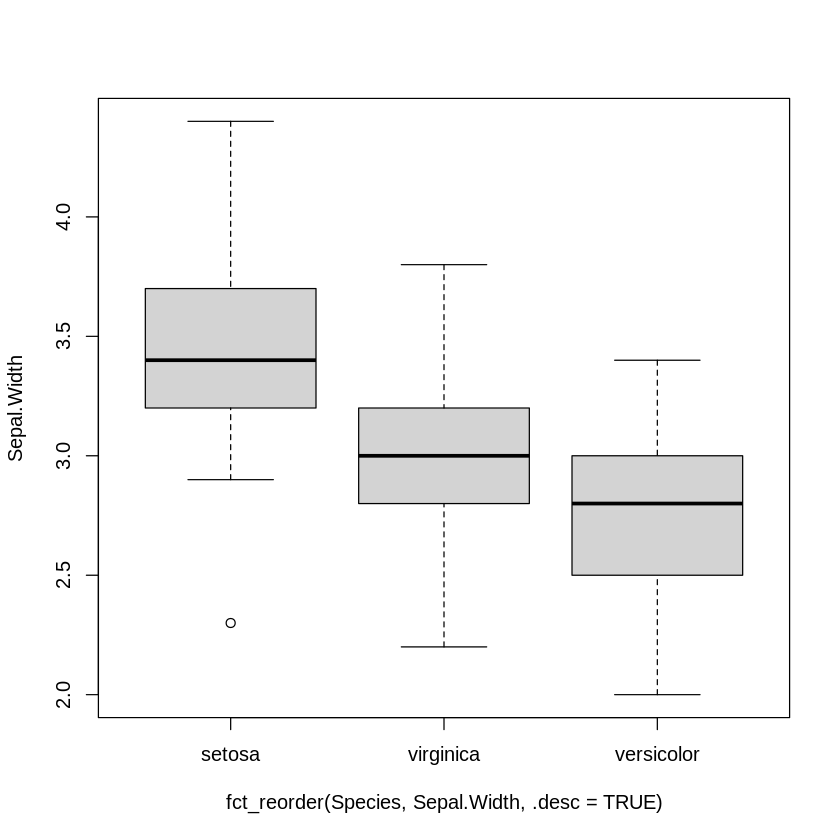

In [47]:
boxplot(Sepal.Width ~ fct_reorder(Species, Sepal.Width, .desc = TRUE), data = iris)

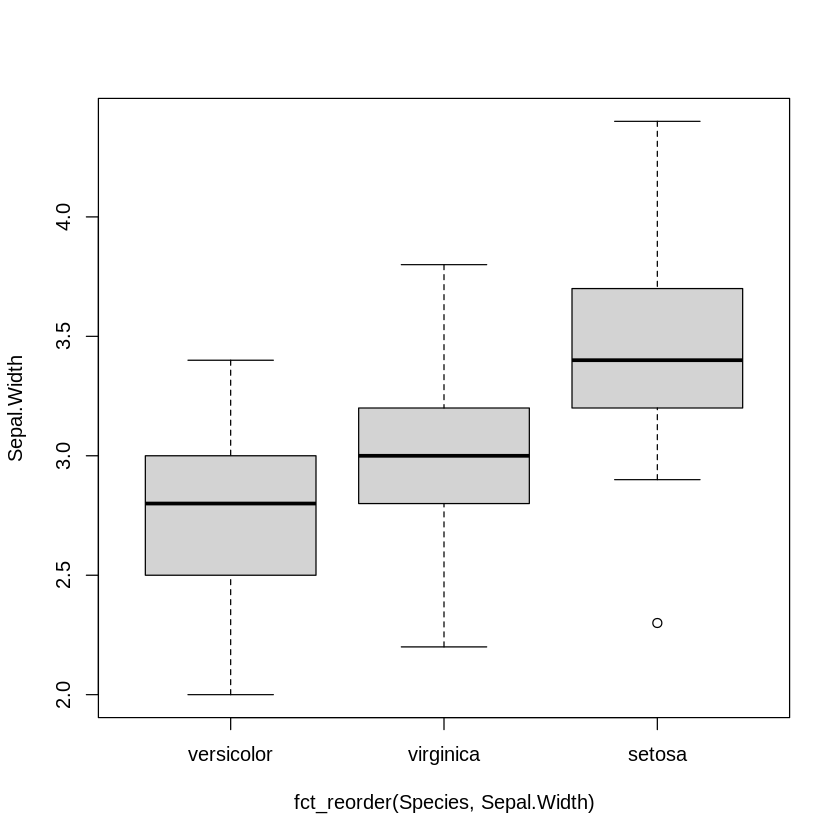

In [48]:
boxplot(Sepal.Width ~ fct_reorder(Species, Sepal.Width), data = iris)

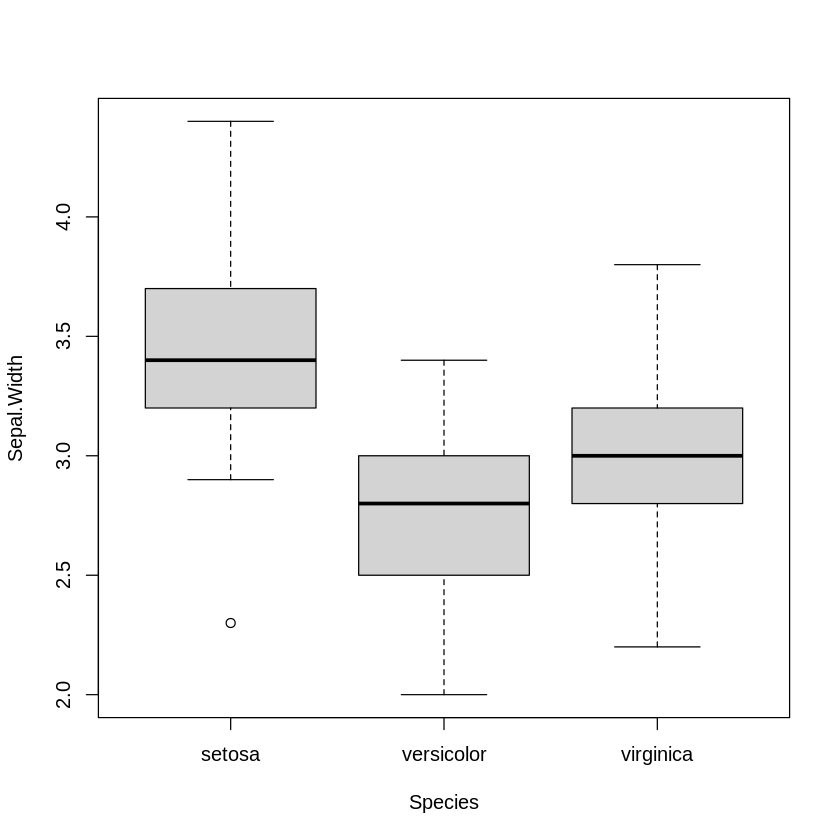

In [46]:
boxplot(Sepal.Width ~ Species, data = iris)

In [41]:
?fct_reorder

fct_reorder {forcats},R Documentation
.f,A factor (or character vector).
".x, .y","The levels of f are reordered so that the values of .fun(.x) (for fct_reorder()) and fun(.x, .y) (for fct_reorder2()) are in ascending order."
.fun,"n summary function. It should take one vector for fct_reorder, and two vectors for fct_reorder2, and return a single value."
...,Other arguments passed on to .fun. A common argument is na.rm = TRUE.
.desc,"Order in descending order? Note the default is different between fct_reorder and fct_reorder2, in order to match the default ordering of factors in the legend."


In [57]:
fct_reorder2(chks$Chick, chks$Time, chks$weight)

[1] 8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9  10 10
[26] 10 10 10 10 10 10 10 10 10 10 13 13 13 13 13 13 13 13 13 13 13 13 15 15 15
[51] 15 15 15 15 15 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 17 17 18
[76] 18 20 20 20 20 20 20 20 20 20 20 20 20
50 Levels: 17 < 8 < 10 < 20 < 9 < 13 < 15 < 16 < 18 < 3 < 47 < 24 < ... < 29

In [58]:
chks

,weight,Time,Chick,Diet
,<dbl>,<dbl>,<ord>,<fct>
85,42,0,8,1
86,50,2,8,1
87,61,4,8,1
88,71,6,8,1
89,84,8,8,1
90,93,10,8,1
91,110,12,8,1
92,116,14,8,1
93,126,16,8,1


In [52]:
chks <- subset(ChickWeight, as.integer(Chick) < 10)
chks <- transform(chks, Chick = fct_shuffle(Chick))

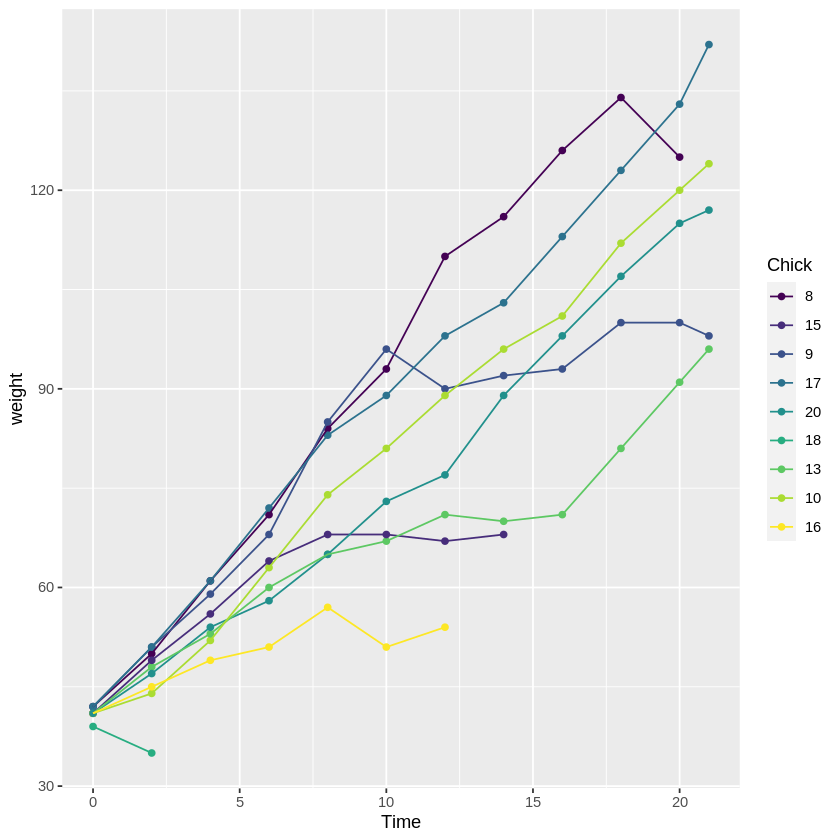

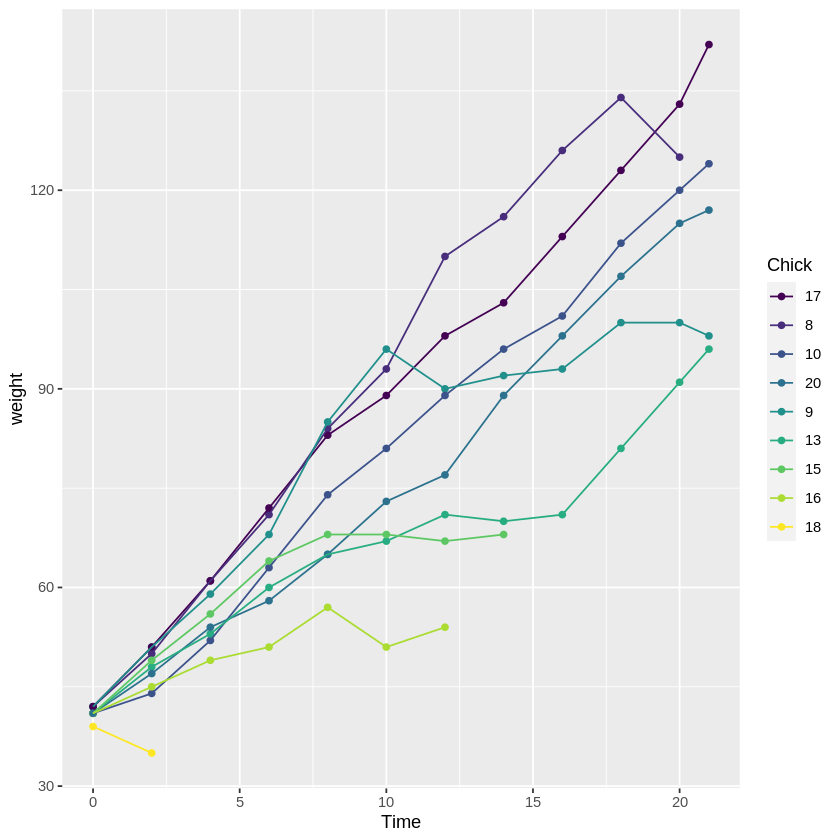

In [60]:
ggplot(chks, aes(Time, weight, colour = Chick)) +
  geom_point() +
  geom_line()

ggplot(chks, aes(Time, weight, colour = fct_reorder2(Chick, Time, weight))) +
  geom_point() +
  geom_line() +
  labs(colour = "Chick")

In [8]:
tvbw_data <- tbl(db.con, "tvbw") %>%
collect() %>%
filter(`Quotation No` == 'PH-KIN04-IVP-2009') %>%
mutate(Date=as_date(Date),
       GroupNum = as.integer(str_extract(Group, "[0-9]{1,2}$")),
       `Inoculation Date`=as_date(`Inoculation Date`),
       `Dosing Date`=as_date(`Dosing Date`),
       `Invivo Study Ending Date`=as_date(`Invivo Study Ending Date`)) %>%
# make Group into a factor type and order it by Group name and then the index number (GroupNum)
mutate(Group=fct_reorder(Group, GroupNum)) #%>%
# select(-GroupNum)

In [16]:
tvbw_data %>% select(`Study ID`, Group, Treatment, `Days on Study Treatment`)

Study ID,Group,Treatment,Days on Study Treatment
<chr>,<fct>,<chr>,<dbl>
PH-ON-KIN-BxPC-3-05192020,G1,Vehicle,1
PH-ON-KIN-BxPC-3-05192020,G1,Vehicle,1
PH-ON-KIN-BxPC-3-05192020,G1,Vehicle,1
PH-ON-KIN-BxPC-3-05192020,G1,Vehicle,1
PH-ON-KIN-BxPC-3-05192020,G1,Vehicle,1
PH-ON-KIN-BxPC-3-05192020,G1,Vehicle,1
PH-ON-KIN-BxPC-3-05192020,G2,FT002787-04 30 mg/kg QD,1
PH-ON-KIN-BxPC-3-05192020,G2,FT002787-04 30 mg/kg QD,1
PH-ON-KIN-BxPC-3-05192020,G2,FT002787-04 30 mg/kg QD,1


In [6]:
tvbw_data

Quotation No,Study ID,Tumor Cell Line,Group,Treatment,Animal ID,BW (g),L (mm),W (mm),TV (mm3),⋯,Frequency_2,Duration_2,Formulation_2,Injected Cell Numbers,Animal,Injected / Implanted position,Inoculation Date,Dosing Date,Invivo Study Ending Date,GroupNum
<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<date>,<date>,<date>,<int>
PH-KIN04-IVP-2009,PH-ON-KIN-BxPC-3-05192020,BxPC-3,G1,Vehicle,10,24.5,9.38,7.59,270.1820,⋯,NA,NA,NA,5x10^6 in 100ul of 1:1 medium/Matrigel,Balb/c nude♀ 6-8w AKYB,Subcutaneous,2020-05-08,2020-06-01,2020-06-16,1
PH-KIN04-IVP-2009,PH-ON-KIN-BxPC-3-05192020,BxPC-3,G1,Vehicle,22,26.2,9.37,6.70,210.3097,⋯,NA,NA,NA,5x10^6 in 100ul of 1:1 medium/Matrigel,Balb/c nude♀ 6-8w AKYB,Subcutaneous,2020-05-08,2020-06-01,2020-06-16,1
PH-KIN04-IVP-2009,PH-ON-KIN-BxPC-3-05192020,BxPC-3,G1,Vehicle,26,24.7,8.10,6.78,186.1720,⋯,NA,NA,NA,5x10^6 in 100ul of 1:1 medium/Matrigel,Balb/c nude♀ 6-8w AKYB,Subcutaneous,2020-05-08,2020-06-01,2020-06-16,1
PH-KIN04-IVP-2009,PH-ON-KIN-BxPC-3-05192020,BxPC-3,G1,Vehicle,49,21.8,9.81,6.81,227.4748,⋯,NA,NA,NA,5x10^6 in 100ul of 1:1 medium/Matrigel,Balb/c nude♀ 6-8w AKYB,Subcutaneous,2020-05-08,2020-06-01,2020-06-16,1
PH-KIN04-IVP-2009,PH-ON-KIN-BxPC-3-05192020,BxPC-3,G1,Vehicle,63,24.6,7.59,6.61,165.8115,⋯,NA,NA,NA,5x10^6 in 100ul of 1:1 medium/Matrigel,Balb/c nude♀ 6-8w AKYB,Subcutaneous,2020-05-08,2020-06-01,2020-06-16,1
PH-KIN04-IVP-2009,PH-ON-KIN-BxPC-3-05192020,BxPC-3,G1,Vehicle,75,26.2,8.37,6.47,175.1879,⋯,NA,NA,NA,5x10^6 in 100ul of 1:1 medium/Matrigel,Balb/c nude♀ 6-8w AKYB,Subcutaneous,2020-05-08,2020-06-01,2020-06-16,1
PH-KIN04-IVP-2009,PH-ON-KIN-BxPC-3-05192020,BxPC-3,G2,FT002787-04 30 mg/kg QD,2,24.2,9.17,7.45,254.4790,⋯,NA,NA,NA,5x10^6 in 100ul of 1:1 medium/Matrigel,Balb/c nude♀ 6-8w AKYB,Subcutaneous,2020-05-08,2020-06-01,2020-06-16,2
PH-KIN04-IVP-2009,PH-ON-KIN-BxPC-3-05192020,BxPC-3,G2,FT002787-04 30 mg/kg QD,21,25.9,8.61,6.41,176.8843,⋯,NA,NA,NA,5x10^6 in 100ul of 1:1 medium/Matrigel,Balb/c nude♀ 6-8w AKYB,Subcutaneous,2020-05-08,2020-06-01,2020-06-16,2
PH-KIN04-IVP-2009,PH-ON-KIN-BxPC-3-05192020,BxPC-3,G2,FT002787-04 30 mg/kg QD,35,22.4,10.98,5.75,181.5131,⋯,NA,NA,NA,5x10^6 in 100ul of 1:1 medium/Matrigel,Balb/c nude♀ 6-8w AKYB,Subcutaneous,2020-05-08,2020-06-01,2020-06-16,2


In [45]:
colnames(tvbw_data)

[1] "Quotation No"                  "Study ID"                     
 [3] "Tumor Cell Line"               "Group"                        
 [5] "Treatment"                     "Animal ID"                    
 [7] "BW (g)"                        "L (mm)"                       
 [9] "W (mm)"                        "TV (mm3)"                     
[11] "Comment"                       "Date"                         
[13] "Days on Study Treatment"       "Days from Tumor Inoculation"  
[15] "BW % Change"                   "TV % Change"                  
[17] "Objectives"                    "Treatment_1"                  
[19] "Dose_1"                        "Volume_1"                     
[21] "Route_1"                       "Frequency_1"                  
[23] "Duration_1"                    "Formulation_1"                
[25] "Treatment_2"                   "Dose_2"                       
[27] "Volume_2"                      "Route_2"                      
[29] "Frequency_2"                   "Duration_2"                   
[31] "Formulation_2"                 "Injected Cell Numbers"        
[33] "Animal"                        "Injected / Implanted position"
[35] "Inoculation Date"              "Dosing Date"                  
[37] "Invivo Study Ending Date"      "GroupNum"

In [5]:
?enquos

tidyeval {ggplot2},R Documentation


In [31]:
df %>% filter (GROUP_ID == 'G1' & SAMPLING_TIME == '2022-07-20 00:00:00')

GROUP_ID,ROUTE,FREQUENCY,N_DOSING,SUBJECT_ID,SUBJECT_TYPE,DOSE_ID,DOSE,DOSE_UNIT,DOSING_SITE,⋯,SAMPLING_TIME,BATCH_ID,FORMULATION_ID,CONCENTRATION,CONCENTRATION_UNIT,TREATMENT,BW_G,L_MM,W_MM,TV_MM_3
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
G1,PO,BID,24,8,MS_001,NA,NA,NA,oral gavage,⋯,2022-07-20 00:00:00,NA,NA,NA,NA,NA,24,8.75,6.8,202.29999999999998
G1,PO,BID,19,34,MS_001,NA,NA,NA,oral gavage,⋯,2022-07-20 00:00:00,NA,NA,NA,NA,NA,25.1,10.11,8.7,382.61294999999996
G1,PO,BID,21,48,MS_001,NA,NA,NA,oral gavage,⋯,2022-07-20 00:00:00,NA,NA,NA,NA,NA,23.3,8.51,7.52,240.62195199999996
G1,PO,BID,26,56,MS_001,NA,NA,NA,oral gavage,⋯,2022-07-20 00:00:00,NA,NA,NA,NA,NA,23.3,10.06,8.63,374.61880700000006
G1,PO,BID,19,74,MS_001,NA,NA,NA,oral gavage,⋯,2022-07-20 00:00:00,NA,NA,NA,NA,NA,23.7,10.9,7.31,291.226745
G1,PO,BID,24,75,MS_001,NA,NA,NA,oral gavage,⋯,2022-07-20 00:00:00,NA,NA,NA,NA,NA,22,9.2,7.93,289.2705399999999
G1,PO,BID,26,77,MS_001,NA,NA,NA,oral gavage,⋯,2022-07-20 00:00:00,NA,NA,NA,NA,NA,23,8.39,7.81,255.87863950000002
G1,PO,BID,24,85,MS_001,NA,NA,NA,oral gavage,⋯,2022-07-20 00:00:00,NA,NA,NA,NA,NA,23.5,8.96,8.55,327.4992000000001


In [30]:
unique(df$SAMPLING_TIME)

[1] "2022-07-27 00:00:00" "2022-07-28 00:00:00" "2022-07-20 00:00:00"
[4] "2022-07-22 00:00:00" "2022-07-24 00:00:00" "2022-07-25 00:00:00"
[7] "2022-07-30 00:00:00" "2022-08-02 00:00:00"

In [25]:
head(df, 20)

,GROUP_ID,ROUTE,FREQUENCY,N_DOSING,SUBJECT_ID,SUBJECT_TYPE,DOSE_ID,DOSE,DOSE_UNIT,DOSING_SITE,⋯,SAMPLING_TIME,BATCH_ID,FORMULATION_ID,CONCENTRATION,CONCENTRATION_UNIT,TREATMENT,BW_G,L_MM,W_MM,TV_MM_3
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,G7,PO,BID,23,49,MS_001,6,10,mg/kg,oral gavage,⋯,2022-07-27 00:00:00,FT003972-01,F_002,1,mg/mL,"Vortex, stir",23.9,NA,NA,NA
2,G7,PO,BID,21,71,MS_001,6,10,mg/kg,oral gavage,⋯,2022-07-27 00:00:00,FT003972-01,F_002,1,mg/mL,"Vortex, stir",23.4,NA,NA,NA
3,G7,PO,BID,19,82,MS_001,6,10,mg/kg,oral gavage,⋯,2022-07-27 00:00:00,FT003972-01,F_002,1,mg/mL,"Vortex, stir",25.9,NA,NA,NA
4,G1,PO,BID,24,8,MS_001,NA,NA,NA,oral gavage,⋯,2022-07-28 00:00:00,NA,NA,NA,NA,NA,25.3,14.68,10.73,845.0754860000001
5,G1,PO,BID,19,34,MS_001,NA,NA,NA,oral gavage,⋯,2022-07-28 00:00:00,NA,NA,NA,NA,NA,24.9,12.57,12.12,923.2313039999999
6,G1,PO,BID,21,48,MS_001,NA,NA,NA,oral gavage,⋯,2022-07-28 00:00:00,NA,NA,NA,NA,NA,22.6,13.55,10.02,680.21271
7,G1,PO,BID,26,56,MS_001,NA,NA,NA,oral gavage,⋯,2022-07-28 00:00:00,NA,NA,NA,NA,NA,24.1,14.12,12.84,1163.951136
8,G1,PO,BID,19,74,MS_001,NA,NA,NA,oral gavage,⋯,2022-07-28 00:00:00,NA,NA,NA,NA,NA,25.3,14.79,11.28,940.9279679999997
9,G1,PO,BID,24,75,MS_001,NA,NA,NA,oral gavage,⋯,2022-07-28 00:00:00,NA,NA,NA,NA,NA,22.1,14.47,11.63,978.5836715


In [ ]:
df %>% 
summarise( `TV (n)` = sum(!is.na(TV_MM_3)))

TV (n)
<int>
1130


In [36]:
df %>% group_by(ANIMAL_ID) %>% mutate(
       SAMPLING_TIME=as.Date(SAMPLING_TIME),
       STARTING_DATE=min(SAMPLING_TIME)
    ) %>%
    summarise(
        TV_PCT_CHANGE = ((TV_MM_3 - TV_MM_3[SAMPLING_TIME == STARTING_DATE]) /
        TV_MM_3[SAMPLING_TIME == STARTING_DATE]) * 100
    )

ERROR: Error: Problem with `summarise()` column `TV_PCT_CHANGE`.
[34mℹ[39m `TV_PCT_CHANGE = *...`.
[31m✖[39m non-numeric argument to binary operator
[34mℹ[39m The error occurred in group 1: ANIMAL_ID = "1".


In [33]:

df.summary <- df %>% 
mutate(TV_MM_3 = as.numeric(TV_MM_3),
       BW_G = as.numeric(BW_G),
       SAMPLING_TIME=as.Date(SAMPLING_TIME),
       STARTING_DATE=min(SAMPLING_TIME)
      ) %>%
group_by(GROUP_ID, BATCH_ID, DOSE, DOSE_UNIT, SAMPLING_TIME, ROUTE, FREQUENCY) %>%
summarise(
        TV_n = sum(TV_MM_3),
        BW_n = sum(BW_G),
        BW_Mean = mean(BW_G),
        TV_Mean = mean(TV_MM_3),
        count = n(),
        TV_SD = sd(TV_MM_3, na.rm = TRUE),
        BW_SD = sd(BW_G, na.rm = TRUE),
        TV_SEM = TV_SD / sqrt(TV_n),
        BW_SEM = BW_SD / sqrt(BW_n),
        `Days on Study Treatment`=as.integer(gsub('[^0-9]','',SAMPLING_TIME-STARTING_DATE))
)
df.summary 

`summarise()` has grouped output by 'GROUP_ID', 'BATCH_ID', 'DOSE', 'DOSE_UNIT', 'SAMPLING_TIME', 'ROUTE', 'FREQUENCY'. You can override using the `.groups` argument.



GROUP_ID,BATCH_ID,DOSE,DOSE_UNIT,SAMPLING_TIME,ROUTE,FREQUENCY,TV_n,BW_n,BW_Mean,TV_Mean,count,TV_SD,BW_SD,TV_SEM,BW_SEM,Days on Study Treatment
<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
G1,NA,NA,NA,2022-07-20,PO,BID,2364.029,187.9,23.4875,295.5036,8,63.46783,0.8806451,1.305351,0.06424473,0
G1,NA,NA,NA,2022-07-20,PO,BID,2364.029,187.9,23.4875,295.5036,8,63.46783,0.8806451,1.305351,0.06424473,0
G1,NA,NA,NA,2022-07-20,PO,BID,2364.029,187.9,23.4875,295.5036,8,63.46783,0.8806451,1.305351,0.06424473,0
G1,NA,NA,NA,2022-07-20,PO,BID,2364.029,187.9,23.4875,295.5036,8,63.46783,0.8806451,1.305351,0.06424473,0
G1,NA,NA,NA,2022-07-20,PO,BID,2364.029,187.9,23.4875,295.5036,8,63.46783,0.8806451,1.305351,0.06424473,0
G1,NA,NA,NA,2022-07-20,PO,BID,2364.029,187.9,23.4875,295.5036,8,63.46783,0.8806451,1.305351,0.06424473,0
G1,NA,NA,NA,2022-07-20,PO,BID,2364.029,187.9,23.4875,295.5036,8,63.46783,0.8806451,1.305351,0.06424473,0
G1,NA,NA,NA,2022-07-20,PO,BID,2364.029,187.9,23.4875,295.5036,8,63.46783,0.8806451,1.305351,0.06424473,0
G1,NA,NA,NA,2022-07-22,PO,BID,3844.302,187.6,23.4500,480.5378,8,107.21424,0.8518887,1.729194,0.06219657,2


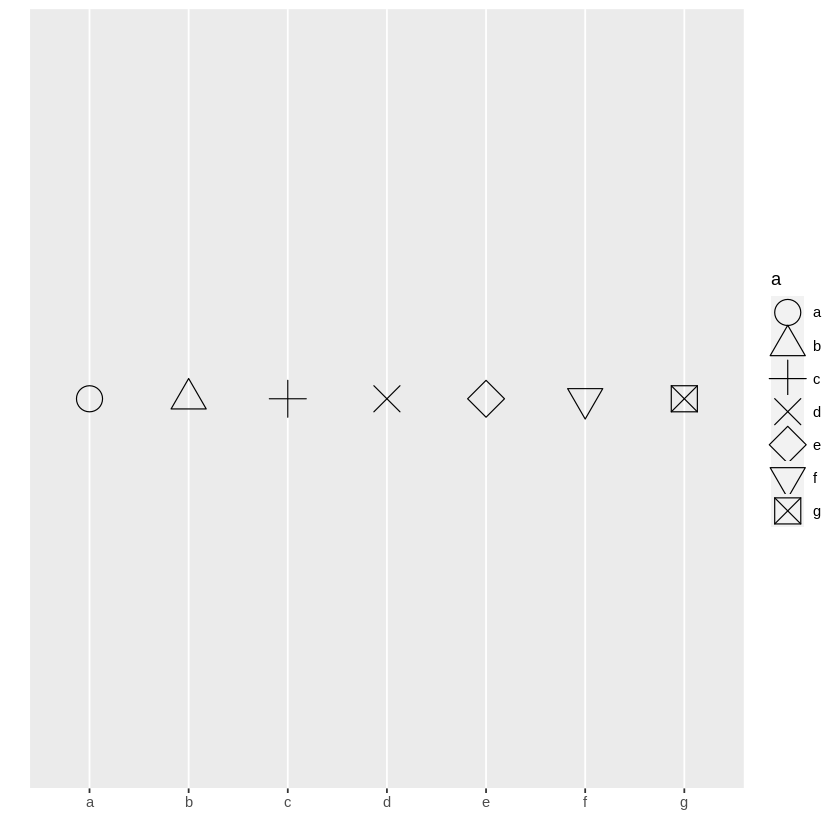

In [57]:
d=data.frame(a=c("a","b","c","d","e","f", "g"))
ggplot() +
scale_x_discrete(name="") +
scale_y_continuous(limits=c(0,1), breaks=NULL, name="") +
scale_shape_manual(values=c(seq(length(unique(d$a))))) +
geom_point(data=d, mapping=aes(x=a, y=0.5, shape=a), size=7)

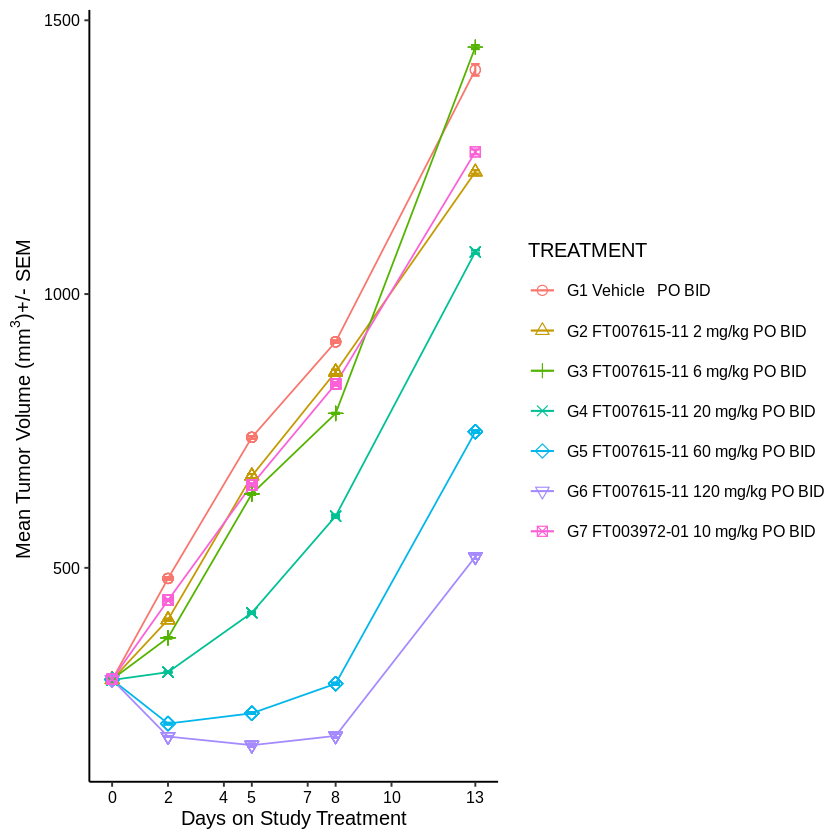

In [62]:

df.summary %>%
    filter(!is.na(TV_Mean)) %>%
        ungroup() %>%
        mutate(TREATMENT = paste(GROUP_ID, 
                                 ifelse(is.na(BATCH_ID), 'Vehicle', BATCH_ID),
                                 ifelse(is.na(DOSE), '', DOSE),
                                 ifelse(is.na(DOSE_UNIT), '', DOSE_UNIT),
                                 ROUTE, 
                                 FREQUENCY) ) %>%
    ggplot() +
    aes_string("`Days on Study Treatment`",
        "TV_Mean" ,
        group = "TREATMENT",
        color = 'TREATMENT') +
    geom_line() +
    # scale_color_manual(values=c25) +
    # scale_fill_manual(values=c25) +
    # scale_shape_manual(values=s25) +
    geom_errorbar(aes(ymax = TV_Mean + TV_SEM, 
                      ymin =
                          TV_Mean - TV_SEM), width = 0.3) +
    geom_point(aes(fill = TREATMENT, shape=TREATMENT), size=2.5) +
        # labs(color="Treatment", fill="Treatment", shape="Treatment") +
    scale_shape_manual(values=c(seq(length(unique(df.summary$GROUP_ID))))) +
    ylab(expression(paste("Mean Tumor Volume (",mm^3,")", "+/- SEM", sep = " "))) +
    scale_x_continuous(breaks=unique(df.summary$`Days on Study Treatment`)) +
    theme_classic(base_size = 12) +
    theme(axis.text = element_text(color="black"),
          legend.key.height = unit(0.85,"cm")#,
          # axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)
         )

In [75]:
rep.int("", 2)

[1] "" ""

In [77]:
x <- factor(LETTERS[1:4]); names(x) <- letters[1:4]
x


a b c d 
A B C D 
Levels: A B C D

In [78]:
rep(x, 2)


a b c d a b c d 
A B C D A B C D 
Levels: A B C D

In [79]:
rep(x, each = 2)

a a b b c c d d 
A A B B C C D D 
Levels: A B C D

In [80]:
rep.int(x, 2)  # no names

a b c d a b c d 
A B C D A B C D 
Levels: A B C D

In [76]:
?rep.int

rep {base},R Documentation
x,a vector (of any mode including a list) or a factor or (for rep only) a POSIXct or POSIXlt or Date object; or an S4 object containing such an object.
...,"further arguments to be passed to or from other methods. For the internal default method these can include: timesan integer-valued vector giving the (non-negative) number of times to repeat each element if of length length(x), or to repeat the whole vector if of length 1. Negative or NA values are an error. A double vector is accepted, other inputs being coerced to an integer or double vector. length.outnon-negative integer. The desired length of the output vector. Other inputs will be coerced to a double vector and the first element taken. Ignored if NA or invalid. eachnon-negative integer. Each element of x is repeated each times. Other inputs will be coerced to an integer or double vector and the first element taken. Treated as 1 if NA or invalid."
"times, length.out",see ... above.


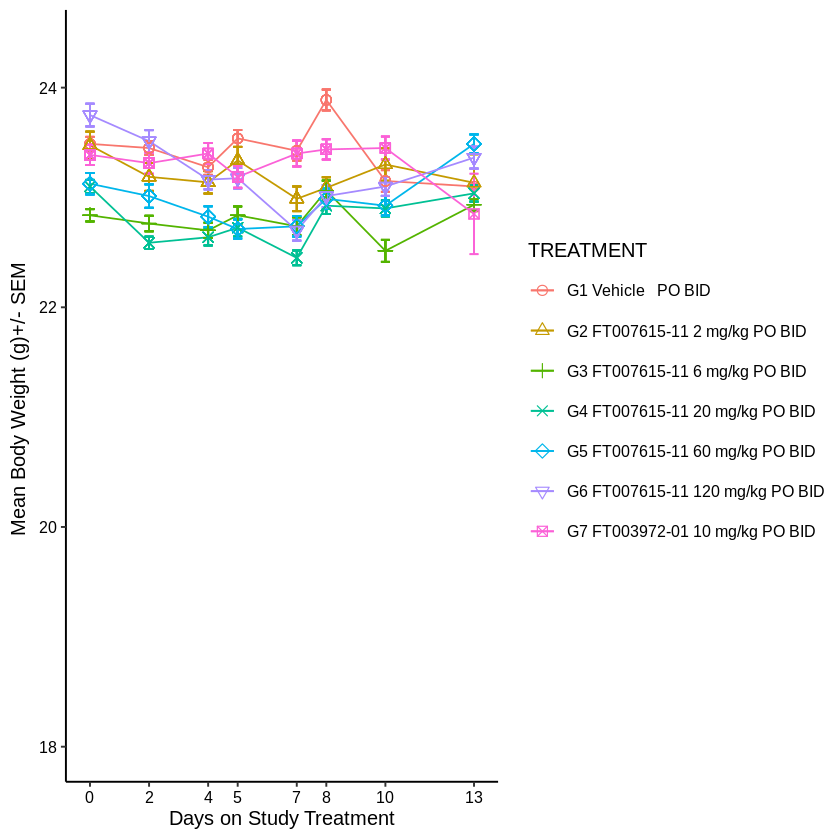

In [69]:
df.summary %>%
    filter(!is.na(BW_Mean)) %>%
        ungroup() %>%
        mutate(TREATMENT = paste(GROUP_ID, 
                                 ifelse(is.na(BATCH_ID), 'Vehicle', BATCH_ID),
                                 ifelse(is.na(DOSE), '', DOSE),
                                 ifelse(is.na(DOSE_UNIT), '', DOSE_UNIT),
                                 ROUTE, 
                                 FREQUENCY) ) %>%
    ggplot() +
    aes_string("`Days on Study Treatment`",
        "BW_Mean" ,
        group = "TREATMENT",
        color = "TREATMENT") +
    geom_line() +
    # scale_color_manual(values=c25) +
    # scale_fill_manual(values=c25) +
    # scale_shape_manual(values=s25) +
    geom_errorbar(aes(ymax = BW_Mean + BW_SEM, 
                      ymin =
                          BW_Mean - BW_SEM), width = 0.3) +
    geom_point(aes(fill = TREATMENT, shape=TREATMENT), size=2.5) +
    scale_shape_manual(values=c(seq(length(unique(df.summary$GROUP_ID))))) +
    ylab(expression(paste("Mean Body Weight (g)", "+/- SEM", sep = " "))) +
    scale_x_continuous(breaks=unique(df.summary$`Days on Study Treatment`)) +
    ylim(18, max(df.summary$BW_Mean)+0.5) + 
    theme_classic(base_size = 12) +
    theme(axis.text = element_text(color="black"),
          legend.key.height = unit(0.85,"cm")
          # axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)
         )

In [48]:
df2.summary <- df2 %>% 
mutate(TV_MM_3 = as.numeric(TV_MM_3), BW_G = as.numeric(BW_G))%>%
group_by(GROUP_ID) %>%
summarise(
        TV_n = sum(TV_MM_3),
        BW_n = sum(BW_G),
        BW_Mean = mean(BW_G),
        TV_Mean = mean(TV_MM_3),
        count = n(),
        TV_SD = sd(TV_MM_3, na.rm = TRUE),
        BW_SD = sd(BW_G, na.rm = TRUE),
        TV_SEM = TV_SD / sqrt(TV_n),
        BW_SEM = BW_SD / sqrt(BW_n)
)
df2.summary 

GROUP_ID,TV_n,BW_n,BW_Mean,TV_Mean,count,TV_SD,BW_SD,TV_SEM,BW_SEM
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
G1,7477.322,189.3,21.03333,830.8136,9,110.0283,0.9460444,1.272423,0.06876005
G10,3156.329,179.1,19.90000,350.7032,9,171.6339,1.1302655,3.055004,0.08445642
G11,2813.466,180.8,20.08889,312.6074,9,151.4574,1.0178954,2.855418,0.07570141
G12,3472.951,179.2,19.91111,385.8835,9,218.0960,0.8161563,3.700823,0.06096834
G13,3129.763,181.3,20.14444,347.7515,9,151.4493,0.8762293,2.707145,0.06507570
G14,3481.599,182.4,20.26667,386.8443,9,143.6326,0.5408327,2.434241,0.04004520
G15,3219.555,183.6,20.40000,357.7283,9,150.9904,1.0476163,2.661041,0.07731539
G2,7739.267,190.7,21.18889,859.9186,9,108.3107,0.7201466,1.231180,0.05214895
G3,7492.436,186.9,20.76667,832.4929,9,121.8973,1.3257074,1.408259,0.09697125


In [ ]:
df2.summary %>%
    filter(!is.na(TV_Mean)) %>%
        ungroup() %>%
        mutate("Group Number" = parse_double(str_extract(GROUP_ID, "[0-9]{1,2}$")),
               Treatment = paste(GROUP_ID, Treatment, sep=": ")) %>%
        mutate(Treatment_Syn = str_replace_all(Treatment, c("FT002787-12"="KIN002787", "FT000960-07"="LXH254"))) %>%
        mutate(BatchID = fct_reorder(Treatment, `Group Number`)) %>%
        mutate(Compound = fct_reorder(Treatment_Syn, `Group Number`)) %>%
    ggplot() +
    aes_string("`Days on Study Treatment`",
        "`TV Mean`" ,
        group = "Group",
        color = 'BatchID') +
    geom_line() +
    scale_color_manual(values=c25) +
    scale_fill_manual(values=c25) +
    scale_shape_manual(values=s25) +
    geom_errorbar(aes(ymax = `TV Mean` + `TV SEM`, 
                      ymin =
                          `TV Mean` - `TV SEM`), width = 0.3) +
    geom_point(aes_string(fill = 'BatchID', shape='BatchID'), color =
                   "black", size=2.5) +
        labs(color="Treatment", fill="Treatment", shape="Treatment") +
    ylab(expression(paste("Mean Tumor Volume (",mm^3,")", "+/- SEM", sep = " "))) +
    scale_x_continuous(breaks=unique(TVBW.summary$`Days on Study Treatment`)) +
    theme_classic(base_size = 12) +
    theme(axis.text = element_text(color="black"),
          legend.key.height = unit(0.85,"cm"))

In [14]:
TVBW.summary <- tvbw_data %>%
    group_by(`Study ID`, Group, Treatment, `Days on Study Treatment`) %>%
    summarise(
        `TV (n)` = sum(!is.na(`TV (mm3)`)),
        `BW (n)` = sum(!is.na(`BW (g)`)),
        `TV Mean` = mean(`TV (mm3)`, na.rm = TRUE),
        `BW Mean` = mean(`BW (g)`, na.rm = TRUE),
        `TV SD` = sd(`TV (mm3)`, na.rm = TRUE),
        `BW SD` = sd(`BW (g)`, na.rm = TRUE),
        `TV SEM` = `TV SD` / sqrt(`TV (n)`),
        `BW SEM` = `BW SD` / sqrt(`BW (n)`),
        `TV Avg Percent Change` = mean(`TV % Change`, na.rm =
                                           TRUE),
        `BW Avg Percent Change` = mean(`BW % Change`, na.rm =
                                           TRUE),
        `TV SD Percent Change` = sd(`TV % Change`, na.rm = TRUE),
        `BW SD Percent Change` = sd(`BW % Change`, na.rm = TRUE),
        `TV SEM Percent Change` = `TV SD Percent Change` / sqrt(`TV (n)`),
        `BW SEM Percent Change` = `BW SD Percent Change` / sqrt(`BW (n)`)
    ) 


`summarise()` has grouped output by 'Study ID', 'Group', 'Treatment'. You can override using the `.groups` argument.



In [15]:
TVBW.summary

Study ID,Group,Treatment,Days on Study Treatment,TV (n),BW (n),TV Mean,BW Mean,TV SD,BW SD,TV SEM,BW SEM,TV Avg Percent Change,BW Avg Percent Change,TV SD Percent Change,BW SD Percent Change,TV SEM Percent Change,BW SEM Percent Change
<chr>,<fct>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PH-ON-KIN-BxPC-3-05192020,G1,Vehicle,1,6,6,205.85630,24.66667,38.87568,1.6095548,15.870930,0.6570980,0.000000,0.00000000,0.000000,0.000000,0.000000,0.0000000
PH-ON-KIN-BxPC-3-05192020,G1,Vehicle,3,6,6,246.42042,25.06667,50.73713,1.4814407,20.713348,0.6047956,19.416152,1.66790680,4.240608,1.694084,1.731221,0.6916068
PH-ON-KIN-BxPC-3-05192020,G1,Vehicle,5,6,6,292.33792,24.96667,70.59629,1.4193895,28.820816,0.5794634,41.641621,1.28454087,15.276648,2.439597,6.236665,0.9959614
PH-ON-KIN-BxPC-3-05192020,G1,Vehicle,7,0,6,NaN,25.38333,NA,1.3600245,NA,0.5552277,NaN,2.99314079,NA,2.577575,NA,1.0522906
PH-ON-KIN-BxPC-3-05192020,G1,Vehicle,8,6,6,403.04311,25.20000,82.85578,1.3682105,33.825731,0.5585696,96.639321,2.26343080,28.846252,3.323183,11.776433,1.3566837
PH-ON-KIN-BxPC-3-05192020,G1,Vehicle,10,0,6,NaN,25.16667,NA,1.3109793,NA,0.5352050,NaN,2.11511454,NA,2.265342,NA,0.9248220
PH-ON-KIN-BxPC-3-05192020,G1,Vehicle,11,6,6,530.76673,24.36667,62.56247,1.1690452,25.541023,0.4772607,160.680917,-1.10679660,19.950784,2.472530,8.144874,1.0094062
PH-ON-KIN-BxPC-3-05192020,G1,Vehicle,13,0,6,NaN,25.50000,NA,1.2633289,NA,0.5157519,NaN,3.47530575,NA,2.010192,NA,0.8206576
PH-ON-KIN-BxPC-3-05192020,G1,Vehicle,15,6,6,761.07893,25.30000,76.10044,1.1081516,31.067876,0.4524010,276.648847,2.70286918,51.170923,2.752350,20.890442,1.1236422


In [18]:
    c25 <- c(
        "grey60",
        "darkturquoise",
        "dodgerblue2", 
        "mediumpurple",
        "deepskyblue4",
        "blue3",
        "deepskyblue3",
        "#CAB2D6", # lt purple
        "orchid1",
        "#E31A1C", # red
        "green4",
        "#FF7F00", # orange
        "gold1",
        "skyblue2", "#FB9A99", # lt pink
        "palegreen2",
        "#FDBF6F", # lt orange
        "gray70", "khaki2",
        "maroon",  "deeppink1", "blue1", "steelblue4",
         "green1", "yellow4", "yellow3",
        "darkorange4", "brown"
    )

s25 <- c(21, 22, 23, 24, 25, 21, 22, 23, 24, 25, 21, 22, 23, 24, 25, 21, 22, 23, 24, 25, 21, 22, 23, 24, 25)


In [21]:
BWsumPlot <- TVBW.summary %>%
    filter(Group %in% paste0('G', seq(8)),
           !is.na(`BW Mean`)) %>%
    ungroup() %>%
    mutate("Group Number" = parse_double(str_extract(Group, "[0-9]{1,2}$")),
           Treatment = paste(Group, Treatment, sep=": ")) %>%
    mutate(Treatment = fct_reorder(Treatment, `Group Number`)) %>%
    ggplot() +
    aes(
        `Days on Study Treatment`,
        `BW Mean`,
        group = Group,
        color = Treatment
    ) +
    geom_line() +
    geom_point(aes(fill = Treatment, shape=Treatment), color = "black", size=1.5) +
    ylim(15, NA) +
    scale_color_manual(values=c25) +
    scale_fill_manual(values=c25) +
    scale_shape_manual(values=s25) +
    geom_errorbar(aes(
        ymax = `BW Mean` + `BW SEM`, ymin = `BW Mean` - `BW SEM`
    ), width = 0.3) +
    ylab("Mean BW (g) +/- SEM") +
    scale_x_continuous(breaks=unique(TVBW.summary$`Days on Study Treatment`)) +
    xlab("") +
    theme_classic(base_size = 8) +
    theme(axis.text = element_text(color="black", size = 6),
          legend.position = "none",
          plot.margin = margin(0,0,-1, 0, "pt"),
          plot.background = element_rect(fill="transparent", color = "transparent"),
          panel.background = element_rect(fill="transparent", color = "transparent"))


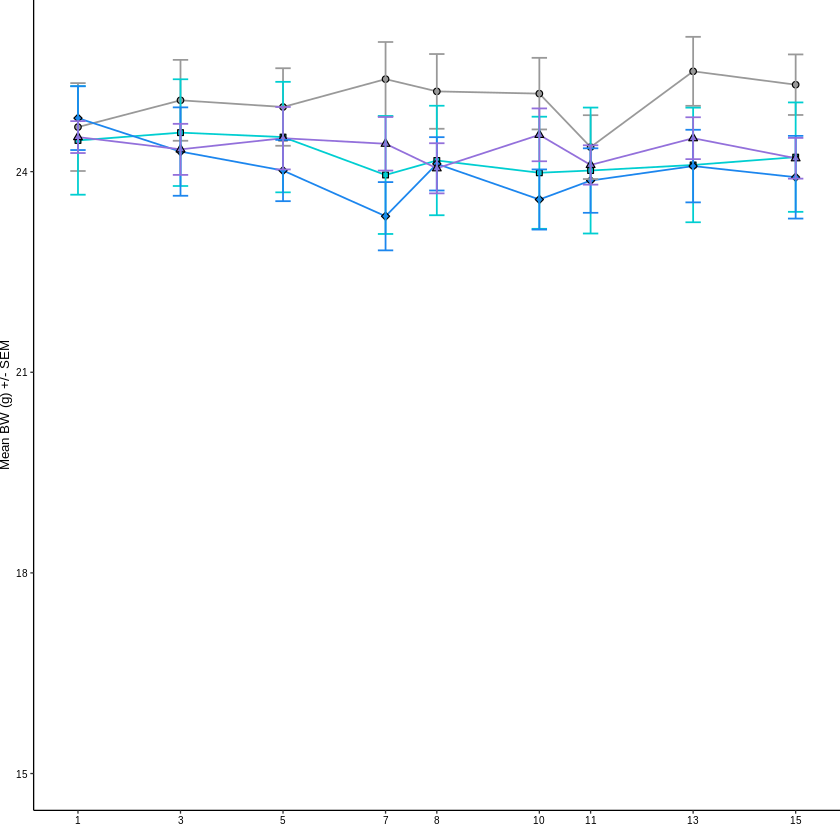

In [22]:
BWsumPlot

In [24]:
BWsumPlot.ins <- TVBW.summary %>%
    filter(Group %in% paste0('G', seq(8)),
           !is.na(`BW Mean`)) %>%
    ungroup() %>%
    mutate("Group Number" = parse_double(str_extract(Group, "[0-9]{1,2}$")),
           Treatment = paste(Group, Treatment, sep=": ")) %>%
    mutate(Treatment = fct_reorder(Treatment, `Group Number`)) %>%
    ggplot() +
    aes(
        `Days on Study Treatment`,
        `BW Mean`,
        group = Group,
        color = Treatment
    ) +
    geom_line() +
    geom_point(aes(fill = Treatment, shape=Treatment), color = "black", size=1.5) +
    ylim(15, NA) +
    scale_color_manual(values=c25) +
    scale_fill_manual(values=c25) +
    scale_shape_manual(values=s25) +
    geom_errorbar(aes(
        ymax = `BW Mean` + `BW SEM`, ymin = `BW Mean` - `BW SEM`
    ), width = 0.3) +
    ylab("Mean BW (g) +/- SEM") +
    scale_x_continuous(breaks=unique(TVBW.summary$`Days on Study Treatment`)) +
    xlab("") +
    theme_classic(base_size = 8) +
    theme(axis.text = element_text(color="black", size = 6),
          legend.position = "none",
          plot.margin = margin(0,0,-1, 0, "pt"),
          plot.background = element_rect(fill="transparent", color = "transparent"),
          panel.background = element_rect(fill="transparent", color = "transparent"))


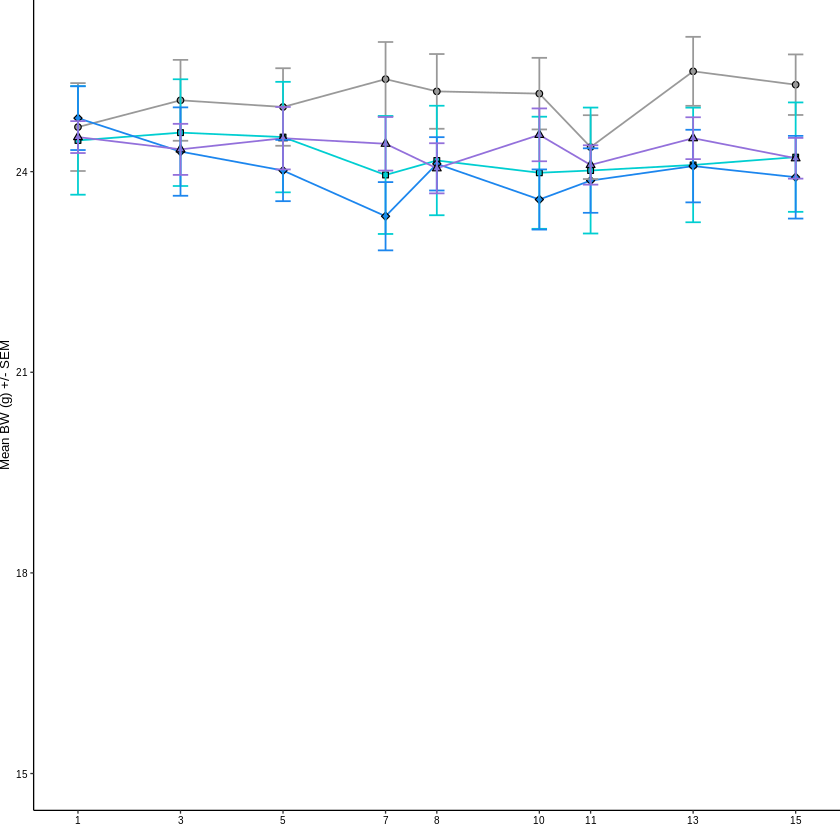

In [25]:
BWsumPlot.ins

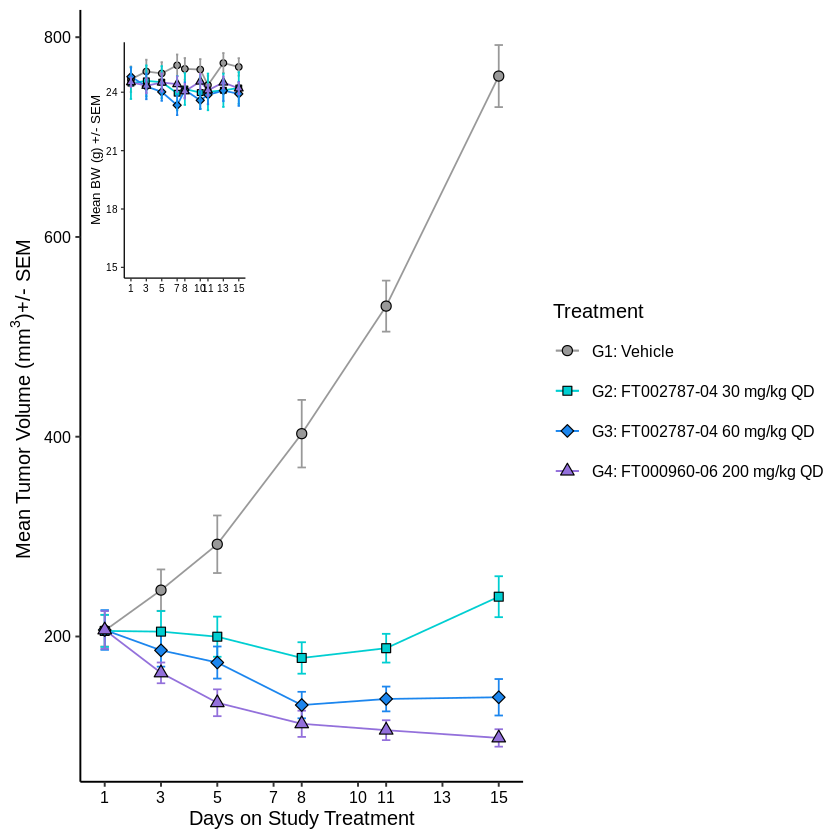

In [27]:
BWinset <- T
TVBW.summary %>%
    filter(Group %in% paste0('G', seq(8)),
           !is.na(`TV Mean`)) %>%
        ungroup() %>%
        mutate("Group Number" = parse_double(str_extract(Group, "[0-9]{1,2}$")),
               Treatment = paste(Group, Treatment, sep=": ")) %>%
        mutate(Treatment_Syn = str_replace_all(Treatment, c("FT002787-12"="KIN002787", "FT000960-07"="LXH254"))) %>%
        mutate(BatchID = fct_reorder(Treatment, `Group Number`)) %>%
        mutate(Compound = fct_reorder(Treatment_Syn, `Group Number`)) %>%
    ggplot() +
    aes_string("`Days on Study Treatment`",
        "`TV Mean`" ,
        group = "Group",
        color = 'BatchID') +
    geom_line() +
    scale_color_manual(values=c25) +
    scale_fill_manual(values=c25) +
    scale_shape_manual(values=s25) +
    geom_errorbar(aes(ymax = `TV Mean` + `TV SEM`, 
                      ymin =
                          `TV Mean` - `TV SEM`), width = 0.3) +
    geom_point(aes_string(fill = 'BatchID', shape='BatchID'), color =
                   "black", size=2.5) +
        labs(color="Treatment", fill="Treatment", shape="Treatment") +
    ylab(expression(paste("Mean Tumor Volume (",mm^3,")", "+/- SEM", sep = " "))) +
        {if (BWinset==TRUE) annotation_custom(ggplotGrob(BWsumPlot.ins), 
                          xmin = min(TVBW.summary$`Days on Study Treatment`)-0.5, 
                          xmax = max(TVBW.summary$`Days on Study Treatment`/2.5), 
                          ymin = max(TVBW.summary$`TV Mean`, na.rm = TRUE) - 
                              (max(TVBW.summary$`TV Mean`, na.rm = TRUE)-min(TVBW.summary$`TV Mean`, na.rm=TRUE))*0.35, 
                          ymax = max(TVBW.summary$`TV Mean`, na.rm = TRUE)+max(TVBW.summary$`TV SEM`, na.rm = TRUE))} +
    scale_x_continuous(breaks=unique(TVBW.summary$`Days on Study Treatment`)) +
    theme_classic(base_size = 12) +
    theme(axis.text = element_text(color="black"),
          legend.key.height = unit(0.85,"cm"))

In [114]:
tbl(db.con, "tvbw") %>%
collect() %>%
filter(`Quotation No` == 'PH-KIN04-IVP-2009') %>%
select(`Study ID`, `Quotation No`, `Tumor Cell Line`, `Injected Cell Numbers`, `Animal`, `Injected / Implanted position`, 
       `Inoculation Date`, `Dosing Date`, `Invivo Study Ending Date`) %>%
distinct() %>%
mutate(`Inoculation Date`=as_date(`Inoculation Date`),
       `Dosing Date`=as_date(`Dosing Date`),
       `Invivo Study Ending Date`=as_date(`Invivo Study Ending Date`))


Study ID,Quotation No,Tumor Cell Line,Injected Cell Numbers,Animal,Injected / Implanted position,Inoculation Date,Dosing Date,Invivo Study Ending Date
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<date>,<date>
PH-ON-KIN-BxPC-3-05192020,PH-KIN04-IVP-2009,BxPC-3,5x10^6 in 100ul of 1:1 medium/Matrigel,Balb/c nude♀ 6-8w AKYB,Subcutaneous,2020-05-08,2020-06-01,2020-06-16


In [115]:
tbl(db.con, "tvbw") %>%
    collect() %>%
    filter(`Quotation No` == 'PH-KIN04-IVP-2009') %>%
    select(Group, Objectives, Treatment, Treatment_1, Dose_1, Volume_1, Route_1, Frequency_1, Formulation_1,
           Treatment_2, Dose_2, Volume_2, Route_2, Frequency_2, Formulation_2) %>%
    distinct()

Group,Objectives,Treatment,Treatment_1,Dose_1,Volume_1,Route_1,Frequency_1,Formulation_1,Treatment_2,Dose_2,Volume_2,Route_2,Frequency_2,Formulation_2
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
G1,Efficacy Safety,Vehicle,Vehicle,NA,10 uL/g,PO,QD,"2% DMSO, 0.5% acetic acid and 97.5% (20% captisol)",NA,NA,NA,NA,NA,NA
G2,Efficacy Safety,FT002787-04 30 mg/kg QD,FT002787-04,30 mg/kg,10 uL/g,PO,QD,"2% DMSO, 0.5% acetic acid and 97.5% (20% captisol)",NA,NA,NA,NA,NA,NA
G3,Efficacy Safety,FT002787-04 60 mg/kg QD,FT002787-04,60 mg/kg,10 uL/g,PO,QD,"2% DMSO, 0.5% acetic acid and 97.5% (20% captisol)",NA,NA,NA,NA,NA,NA
G4,Efficacy Safety,FT000960-06 200 mg/kg QD,FT000960-06,200 mg/kg,10 uL/g,PO,QD,"2% DMSO, 0.5% acetic acid and 97.5% (20% captisol)",NA,NA,NA,NA,NA,NA


In [116]:
tbl(db.con, "pk_efficacy") %>%
    collect() %>%
    filter(`Quotation No` == 'PH-KIN04-IVP-2009') 

Quotation No,Sample Name,Group,Animal ID,Hours Post Dose,Sample ID,Sample Type,Compound,Dilution Factor,Analyte Retention Time (min),Analyte Peak Area (counts),IS Retention Time (min),IS Peak Area (counts),Analyte Concentration (ng/mL),Calculated Concentration (ng/mL),Accuracy (%),Use Record
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
PH-KIN04-IVP-2009,G2_M2_24h,G2,M2,24.00,NA,Unknown,FT002787-04,1,1.19,36100,1.19,214000,N/A,7.82,N/A,NA
PH-KIN04-IVP-2009,G2_M21_24h,G2,M21,24.00,NA,Unknown,FT002787-04,1,1.2,50800,1.2,207000,N/A,11.30,N/A,NA
PH-KIN04-IVP-2009,G2_M35_24h,G2,M35,24.00,NA,Unknown,FT002787-04,1,1.2,21300,1.2,217000,N/A,4.57,N/A,NA
PH-KIN04-IVP-2009,G2_M2_7h*25,G2,M2,7.00,NA,Unknown,FT002787-04,25,1.19,99800,1.19,230000,N/A,499.00,N/A,NA
PH-KIN04-IVP-2009,G2_M21_7h*25,G2,M21,7.00,NA,Unknown,FT002787-04,25,1.19,156000,1.19,226000,N/A,793.00,N/A,NA
PH-KIN04-IVP-2009,G2_M35_7h*25,G2,M35,7.00,NA,Unknown,FT002787-04,25,1.19,188000,1.19,224000,N/A,965.00,N/A,NA
PH-KIN04-IVP-2009,G2_M2_3h*25,G2,M2,3.00,NA,Unknown,FT002787-04,25,1.19,487000,1.19,230000,N/A,2430.00,N/A,NA
PH-KIN04-IVP-2009,G2_M21_3h*25,G2,M21,3.00,NA,Unknown,FT002787-04,25,1.19,470000,1.19,229000,N/A,2350.00,N/A,NA
PH-KIN04-IVP-2009,G2_M35_3h*25,G2,M35,3.00,NA,Unknown,FT002787-04,25,1.19,539000,1.19,223000,N/A,2770.00,N/A,NA


In [86]:
fileTVBW <- file.path("/home/jovyan/work/Documents/data_files/Data for BaF3-D1228N study PH-KIN-07-IVP-2022-030-DSC_(EffVisR-TVBW-raw-data).XLSX")
PG.data <-
lapply(grep("^PG", excel_sheets(fileTVBW), value = TRUE), function(x)
read_excel(
    fileTVBW,
    x,
    skip = 2,
    col_types = "text"
))


In [87]:
PG.data

Group,Animal ID,BW (g),D (mm),d (mm),TV (mm3),Comment
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
G1,8,24,8.75,6.8,202.29999999999998,NA
Vehicle,34,25.1,10.11,8.6999999999999993,382.61294999999996,NA
"0.5% MC, 0.1% Tween80",48,23.3,8.51,7.52,240.62195199999996,NA
in DI water,56,23.3,10.06,8.6300000000000008,374.61880700000006,NA
"PO, BID x 14 days",74,23.7,10.9,7.31,291.22674499999999,NA
NA,75,22,9.1999999999999993,7.93,289.27053999999993,NA
NA,77,23,8.39,7.81,255.87863950000002,NA
NA,85,23.5,8.9600000000000009,8.5500000000000007,327.49920000000009,NA
NA,Mean,23.487500000000001,NA,NA,295.5036041875,NA


In [88]:
header.tmp <-
lapply(grep("^PG",
excel_sheets(fileTVBW),
value = TRUE), function(x)
    read_excel(fileTVBW,
               x,
               col_names = FALSE))
# this is why there are columns named ...1, ...2, etc
# lapply on the entire excel file for each sheet that begins with PG

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ...

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ...

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ...

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ...

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ...



In [89]:
header.tmp

...1,...2,...3,...4,...5,...6,...7
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Study ID:,PH-KIN-07-IVP-2022-030-DSC,NA,NA,NA,NA,NA
Date:,44762,NA,NA,NA,NA,NA
Group,Animal ID,BW (g),D (mm),d (mm),TV (mm3),Comment
G1,8,24,8.75,6.8,202.29999999999998,NA
Vehicle,34,25.1,10.11,8.6999999999999993,382.61294999999996,NA
"0.5% MC, 0.1% Tween80",48,23.3,8.51,7.52,240.62195199999996,NA
in DI water,56,23.3,10.06,8.6300000000000008,374.61880700000006,NA
"PO, BID x 14 days",74,23.7,10.9,7.31,291.22674499999999,NA
NA,75,22,9.1999999999999993,7.93,289.27053999999993,NA


In [ ]:

names(header.tmp) <-
grep("^PG",
 excel_sheets(fileTVBW),
 value = TRUE)

In [93]:
header.tmp[[1]] %>%
    mutate(`...1` = str_replace(`...1`, "\\:", "")) # remove ':' from entire column named ...1

...1,...2,...3,...4,...5,...6,...7
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Study ID,PH-KIN-07-IVP-2022-030-DSC,NA,NA,NA,NA,NA
Date,44762,NA,NA,NA,NA,NA
Group,Animal ID,BW (g),D (mm),d (mm),TV (mm3),Comment
G1,8,24,8.75,6.8,202.29999999999998,NA
Vehicle,34,25.1,10.11,8.6999999999999993,382.61294999999996,NA
"0.5% MC, 0.1% Tween80",48,23.3,8.51,7.52,240.62195199999996,NA
in DI water,56,23.3,10.06,8.6300000000000008,374.61880700000006,NA
"PO, BID x 14 days",74,23.7,10.9,7.31,291.22674499999999,NA
NA,75,22,9.1999999999999993,7.93,289.27053999999993,NA


In [ ]:

pull.heads <- function(x) {
x %>%
mutate(`...1` = str_replace(`...1`, "\\:", "")) %>%
slice(1:2) %>%
select(1:2) %>%
column_to_rownames("...1") %>%
t %>% as_tibble() %>%
mutate(Date = as_date(as.Date(as.numeric(Date), origin =
                                  "1899-12-30")))
}

PG.headers <- map(header.tmp, pull.heads)

PG.data <-
lapply(grep("^PG", excel_sheets(input$fileTVBW$datapath), value = TRUE), function(x)
read_excel(
    input$fileTVBW$datapath,
    x,
    skip = 2,
    col_types = "text"
))

names(PG.data) <-
grep("^PG", excel_sheets(input$fileTVBW$datapath), value = TRUE)
